In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# Read in the data
filepath = "/Users/ejnewby/MEDS/EDS-220/eds220-2024-sections/data/earthquake_data.csv"
earthquakes = pd.read_csv(filepath)

In [3]:
os.getcwd()

'/Users/ejnewby/MEDS/EDS-220/eds220-2024-sections'

In [4]:
# Read in other data
fp = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-2024-sections','data','ne_110m_admin_0_countries[1].shp')
countries = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [5]:
# select data 
eqk_sub = (earthquakes['mag'] >= 6.5) & (earthquakes['type'] == 'earthquake') 
eqk_sub = earthquakes[eqk_sub]

In [6]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
# convert data frame to gpd
points = gpd.points_from_xy(earthquakes.longitude,
                           earthquakes.latitude)

eqk_gdf = gpd.GeoDataFrame(earthquakes, geometry = points, crs = 'EPSG:4326')

In [8]:
countries.crs == eqk_gdf.crs

True

<Axes: title={'center': 'Earthquakes of magnitude of at least 6.5 in 2014'}>

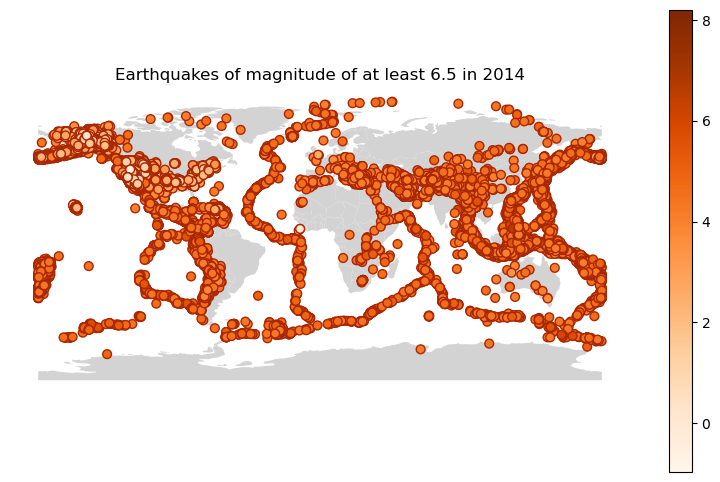

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax.axis('off')

ax.set_title('Earthquakes of magnitude of at least 6.5 in 2014',
             fontsize = 12)

# add countries
countries.plot(ax = ax, color = '#D3D3D3', edgecolor = 'none')

# add earthquakes
eqk_gdf.plot(ax = ax, 
             column = 'mag', 
             legend = True, 
             edgecolors = '#AA2704', 
             markersize = 40,
             cmap = 'Oranges')